<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

csvFile = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"
new_types = {
    "Name": "string",
    "Type 1": "string",
    "Type 2": "string"
}

# Changes the data types of the Name, Type 1, and Type 2 fields from objects to strings.
# Changes any "-" to NaN.
# Reads the csv file and stores the data in a dataframe.
pokemon = pd.read_csv(csvFile, dtype=new_types, na_values=["-"])
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,<NA>,309,39,52,43,60,50,65,1,False


## Q1: Plot the relationship between Attack and Defense
Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint. You can choose your favorite palette. Include a meaninful title in the plot. After creating the plot, insert a markdown cell immediately following the plot to describe the relationship between Attack and Defense in this dataset.

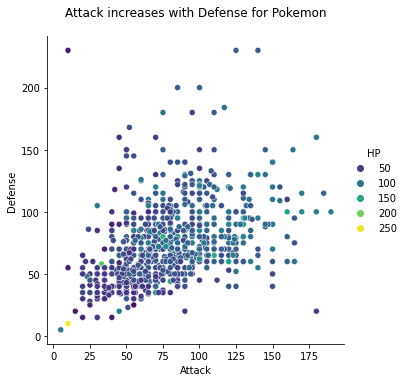

In [2]:
# Creates a relationship plot with Attack on the x-axis and Defense on the y-axis, and uses hue to display the HP for each datapoint.
sns.relplot(
    data=pokemon,
    x="Attack",
    y="Defense",
    hue="HP",
    palette="viridis"
)
plt.title("Attack increases with Defense for Pokemon", pad=20);

From the plot, I observed that Pokemon with greater attack have greater defense, but they tend to have more moderate HP.

## Q2: Plot the relationship between Attack and Total using a hexbin plot
Create a hexbin plot using seaborn's `joinplot` function. Plot `Attack` on the x-axis and `Total` on the y-axis. You can choose the gridsize. Include a title for the plot "Attack vs total for all Pokemon". After generating the plot, insert a markdown cell to answer this question: The hexbin plot displays the relationship between `Attack` and `Total`, what else does this plot show?

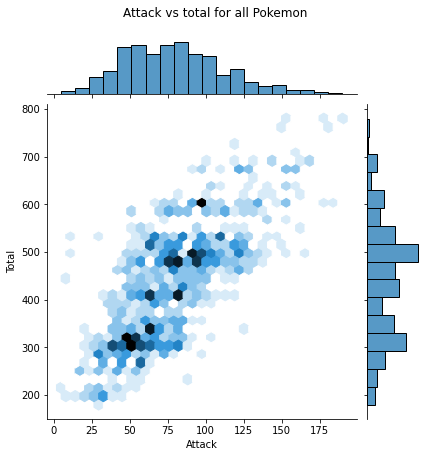

In [14]:
# Creates a hexbin plot with Attack on the x-axis and Total on the y-axis.
g = sns.jointplot(
    data=pokemon,
    x="Attack",
    y="Total",
    kind="hex",
    gridsize=30
)
g.fig.suptitle("Attack vs total for all Pokemon", y=1.05);

The plot also shows the concentration of Pokemon data points within different regions. A hexbin with a dark color means that there are many Pokemon data points within that region, whereas a hexbin with a light color means that there are few Pokemon data points within that region. From the plot, I observed that there are many Pokemon with Attack between 50 and 100 and Total between 300 and 500.

## Q3: Create two categorical plots for Pokemon types. `Type 1` and `Type 2` . 
For each plot, the unique values of `Type 1` or `Type 2` should be plotted along the y-axis, and the counts of Pokemon should be on the x-axis. Use the color red for the `Type 1` plot and blue for the `Type 2` plot. After the two plots are displayed, insert a markdown cell to write your findings: Which are the most common `Type 1` and `Type 2` Pokemons, and which are the most rare ones?

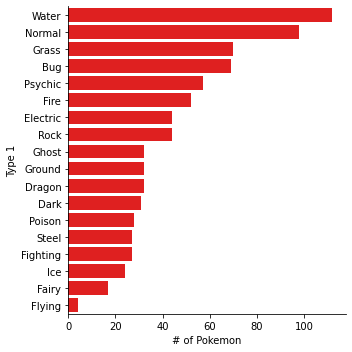

In [4]:
# Creates a categorical plot for Pokemon Type 1.
type1_df = pokemon["Type 1"].to_frame()
sns.catplot(
    y="Type 1",
    data=type1_df,
    kind="count",
    order=type1_df["Type 1"].value_counts().index,
    color="red"
).set_axis_labels("# of Pokemon", "Type 1");

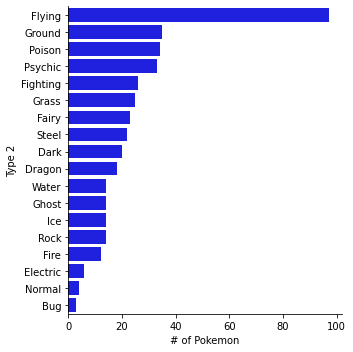

In [5]:
# Creates a categorical plot for Pokemon Type 2.
type2_df = pokemon["Type 2"].to_frame()
sns.catplot(
    y="Type 2",
    data=type2_df,
    kind="count",
    order=type2_df["Type 2"].value_counts().index,
    color="blue"
).set_axis_labels("# of Pokemon", "Type 2");

The most common Type 1 Pokemon is Water, and the most common Type 2 Pokemon is Flying. The most rare Type 1 Pokemon is Flying, and the most rare Type 2 Pokemon is Bug.